In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

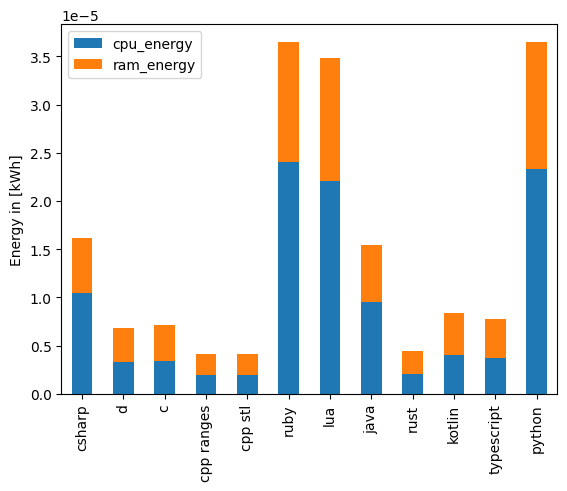

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000010,0.000006
d,0.000003,0.000004
c,0.000003,0.000004
cpp ranges,0.000002,0.000002
cpp stl,0.000002,0.000002
ruby,0.000024,0.000012
lua,0.000022,0.000013
java,0.000010,0.000006
rust,0.000002,0.000002


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000010,0.000006,0.000016
d,0.000003,0.000004,0.000007
c,0.000003,0.000004,0.000007
cpp ranges,0.000002,0.000002,0.000004
cpp stl,0.000002,0.000002,0.000004
ruby,0.000024,0.000012,0.000037
lua,0.000022,0.000013,0.000035
java,0.000010,0.000006,0.000015
rust,0.000002,0.000002,0.000004


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
python,0.000023,0.000013,0.000037
ruby,0.000024,0.000012,0.000037
lua,0.000022,0.000013,0.000035
csharp,0.000010,0.000006,0.000016
java,0.000010,0.000006,0.000015
kotlin,0.000004,0.000004,0.000008
typescript,0.000004,0.000004,0.000008
c,0.000003,0.000004,0.000007
d,0.000003,0.000004,0.000007


In [9]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [10]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000010,0.000006,0.000016,3.907948
d,0.000003,0.000004,0.000007,1.661764
c,0.000003,0.000004,0.000007,1.721028
cpp ranges,0.000002,0.000002,0.000004,1.003900
cpp stl,0.000002,0.000002,0.000004,1.000000
ruby,0.000024,0.000012,0.000037,8.825387
lua,0.000022,0.000013,0.000035,8.429155
java,0.000010,0.000006,0.000015,3.738583
rust,0.000002,0.000002,0.000004,1.070315


In [11]:
df3 = df2[["normed_total_energy"]]

In [12]:
df3

,normed_total_energy
project_name,
csharp,3.907948
d,1.661764
c,1.721028
cpp ranges,1.003900
cpp stl,1.000000
ruby,8.825387
lua,8.429155
java,3.738583
rust,1.070315


Text(0.5, 0, '')

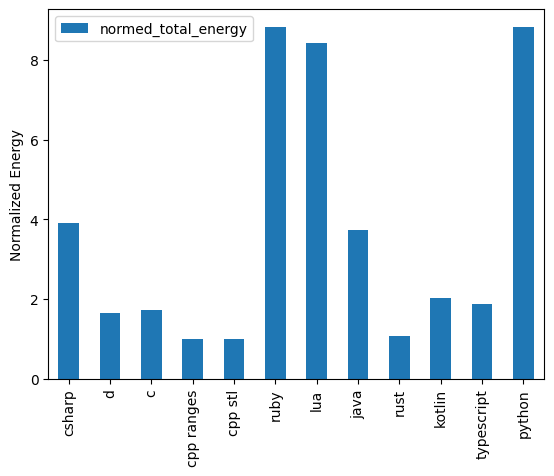

In [13]:
df3.plot.bar(stacked=True)
plt.ylabel("Normalized Energy")
plt.xlabel("")

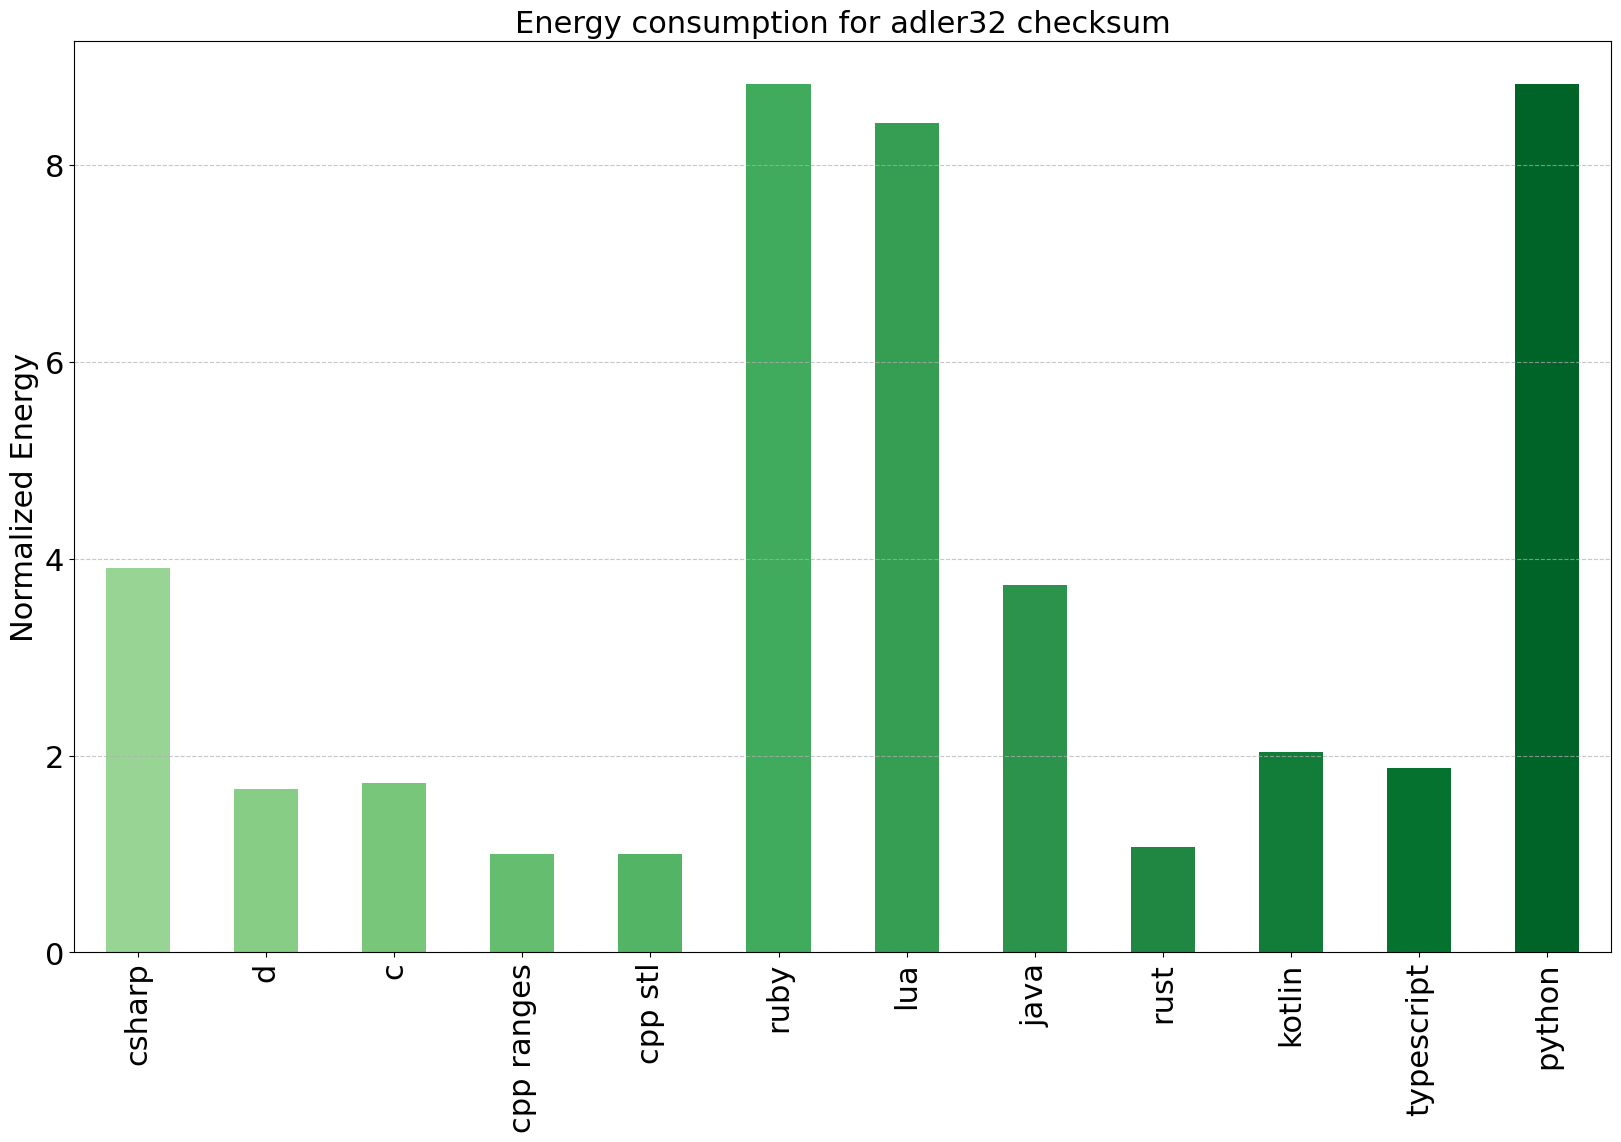

In [26]:
# Generate shades of green for each bar
plt.figure(figsize=(19.84, 11.84))  # Set figure size
colors = cm.Greens(np.linspace(0.4, 0.9, len(df3)))

ax = df3["normed_total_energy"].plot(kind="bar", color=colors)
plt.ylabel("Normalized Energy", fontsize=22)
plt.xlabel("")
plt.title("Energy consumption for adler32 checksum", fontsize=22)  # Add title
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid on y-axis
plt.show()

In [15]:
df4 = df2[["normed_total_energy"]]
df4["ram_energy"] = df2.ram_energy / min_val

C:\Users\hniemeyer\AppData\Local\Temp\ipykernel_6860\1593215994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["ram_energy"] = df2.ram_energy / min_val


In [16]:
df4.round(2)

,normed_total_energy,ram_energy
project_name,,
csharp,3.91,1.39
d,1.66,0.87
c,1.72,0.90
cpp ranges,1.00,0.53
cpp stl,1.00,0.52
ruby,8.83,3.01
lua,8.43,3.08
java,3.74,1.43
rust,1.07,0.56


In [17]:
min_val

4.137064558333144e-06

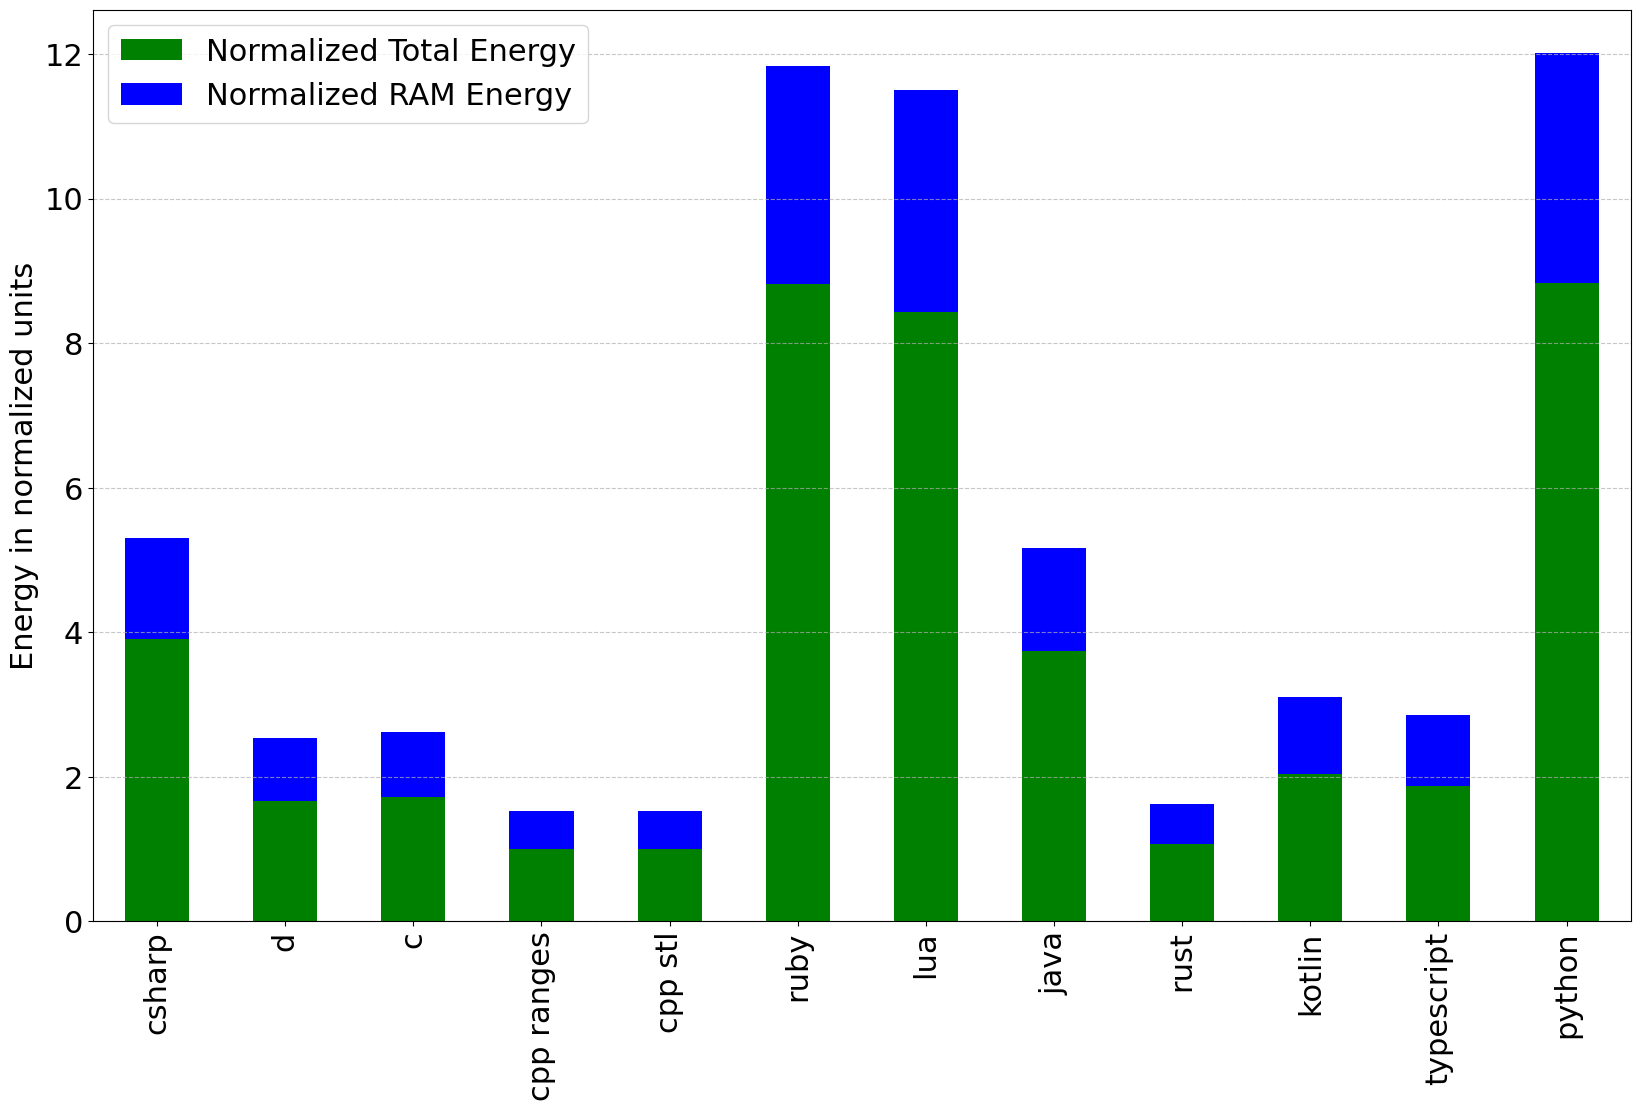

In [28]:
colors = ['green', 'blue', 'olive', 'seagreen', 'forestgreen'][:len(df3)]
ax = df4.plot.bar(stacked=True, color=colors, figsize=(19.84, 11.84))
plt.ylabel("Energy in normalized units", fontsize=22)
plt.xlabel("")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(["Normalized Total Energy", "Normalized RAM Energy"], fontsize=22)  # Your custom legend labels
